In [1]:
import nengo
import numpy as np
import pylab as plt

%matplotlib widget

In [2]:
# Use NxSDK backend on Loihi
import nengo_loihi
nengo_loihi.set_defaults()

In [3]:
def input_func(t):
    return [np.sin(t), np.cos(t)]

with nengo.Network(label="MLP") as model:
    sin_node = nengo.Node(output=input_func)
    ens = nengo.Ensemble(n_neurons=10000, dimensions=2, neuron_type=nengo.LIF())
    nengo.Connection(sin_node, ens)
    ens_probe = nengo.Probe(ens)

In [13]:
with nengo.Simulator(model, seed=0) as sim:
    sim.run(10)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

In [4]:
with nengo_loihi.Simulator(model, seed=1, dt=1e-3) as sim:
    sim.run(10)
t = sim.trange()

BuildError: LoihiBlock(<Connection from <Ensemble (unlabeled) at 0x7f5c1085fb20> to <Probe of 'decoded_output' of <Ensemble (unlabeled) at 0x7f5c1085fb20>>>[0:2:1]): Input axons (10000) exceeded max (4096)

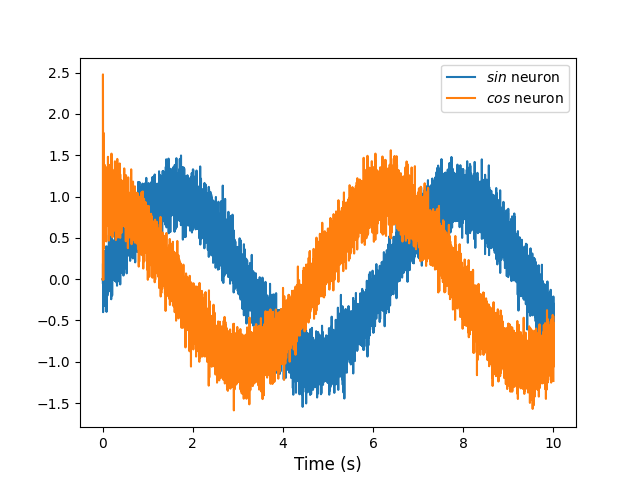

In [18]:
def plot_over_time(t, data):
    plt.figure()
    plt.plot(t, data[ens_probe])
    plt.xlabel("Time (s)", fontsize="large")
    plt.legend(["$sin$ neuron", "$cos$ neuron"])


plot_over_time(t, sim.data)